# Run CoCiP over a flight

This tutorial walks through an example of running the [Contrail Cirrus Predicition (CoCiP)](https://gmd.copernicus.org/articles/5/543/2012/) model evaluation along a flight trajectory.

## References

- Schumann, U. “A Contrail Cirrus Prediction Model.” Geoscientific Model Development 5, no. 3 (May 3, 2012): 543–80. https://doi.org/10.5194/gmd-5-543-2012.
- Schumann, U., B. Mayer, K. Graf, and H. Mannstein. “A Parametric Radiative Forcing Model for Contrail Cirrus.” Journal of Applied Meteorology and Climatology 51, no. 7 (July 2012): 1391–1406. https://doi.org/10.1175/JAMC-D-11-0242.1.
- Teoh, Roger, Ulrich Schumann, Arnab Majumdar, and Marc E. J. Stettler. “Mitigating the Climate Forcing of Aircraft Contrails by Small-Scale Diversions and Technology Adoption.” Environmental Science & Technology 54, no. 5 (March 3, 2020): 2941–50. https://doi.org/10.1021/acs.est.9b05608.
- Teoh, Roger, Ulrich Schumann, Edward Gryspeerdt, Marc Shapiro, Jarlath Molloy, George Koudis, Christiane Voigt, and Marc Stettler. “Aviation Contrail Climate Effects in the North Atlantic from 2016&ndash;2021.” Atmospheric Chemistry and Physics Discussions, March 30, 2022, 1–27. https://doi.org/10.5194/acp-2022-169.

In [2]:
!pip install pycontrails

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.1 MB/s eta 0:00:00


In [3]:
import pandas as pd

from pycontrails import Flight
from pycontrails.datalib.ecmwf import ERA5
from pycontrails.models.cocip import Cocip
from pycontrails.models.humidity_scaling import ConstantHumidityScaling
from pycontrails.physics import units

In [ ]:
# install all optional runtime dependencies
!pip install "pycontrails[complete]"

# install specific optional dependencies
!pip install "pycontrails[dev]"      # Development dependencies
!pip install "pycontrails[docs]"     # Documentation / Sphinx dependencies
!pip install "pycontrails[ecmwf]"    # ECMWF datalib interfaces
!pip install "pycontrails[gcp]"      # Google Cloud Platform caching interface
!pip install "pycontrails[gfs]"      # GFS datalib interfaces
!pip install "pycontrails[jupyter]"  # Jupyter notebook and lab interface
!pip install "pycontrails[vis]"      # Polygon construction methods and plotting support
!pip install "pycontrails[zarr]"     # Load data from remote Zarr stores

# These packages may not support the latest python version
# and are excluded from "complete"
!pip install "pycontrails[open3d]"   # Polyhedra contruction methods

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━

ERROR: Operation cancelled by user


## Load Flight

Load flight trajectory from dataset prepared by Roger Teoh in https://doi.org/10.5194/acp-2022-169

In [4]:
# load flight waypoints
df_flight = pd.read_csv("/content/flight-cocip.csv")
df_flight.head()

,Longitude (degrees),Latitude (degrees),Altitude (feet),UTC time,True airspeed (m s-1),Mach Number,Aircraft mass (kg),Fuel mass flow rate (kg s-1),Overall propulsion efficiency,nvPM number emissions index (kg-1),ICAO Aircraft Type,Wingspan (m)
0,-10.070,55.185,36000,1546651185,230.858,0.791,236479.000,1.654,0.4,1500000000000000,A359,64.75
1,-10.273,55.222,36000,1546651245,230.682,0.790,236379.755,1.657,0.4,1500000000000000,A359,64.75
2,-10.476,55.258,36000,1546651305,230.563,0.789,236280.355,1.659,0.4,1500000000000000,A359,64.75
3,-10.680,55.295,36000,1546651365,230.501,0.789,236180.791,1.661,0.4,1500000000000000,A359,64.75
4,-10.883,55.331,36000,1546651425,230.476,0.789,236081.128,1.662,0.4,1500000000000000,A359,64.75


In [5]:
# constant properties along the length of the flight
attrs = {
    "flight_id": "fid",
    "aircraft_type": df_flight["ICAO Aircraft Type"].values[0],
    "wingspan": df_flight["Wingspan (m)"].values[0],
}

Process the flight into a format expected by `pycontrails`. See [pycontrails.Flight](https://py.contrails.org/api/pycontrails.Flight.html#pycontrails.Flight) for interface details.

In [6]:
# convert UTC timestamp to np.datetime64
df_flight["time"] = pd.to_datetime(df_flight["UTC time"], origin="unix", unit="s")

# set altitude in m
df_flight["altitude"] = units.ft_to_m(df_flight["Altitude (feet)"])

# rename a few columns for compatibility with `Flight` requirements
df_flight = df_flight.rename(
    columns={
        "Longitude (degrees)": "longitude",
        "Latitude (degrees)": "latitude",
        "True airspeed (m s-1)": "true_airspeed",
        "Mach Number": "mach_number",
        "Aircraft mass (kg)": "aircraft_mass",
        "Fuel mass flow rate (kg s-1)": "fuel_flow",
        "Overall propulsion efficiency": "engine_efficiency",
        "nvPM number emissions index (kg-1)": "nvpm_ei_n",
    }
)

# clean up a few columns before building Flight class
df_flight = df_flight.drop(
    columns=["ICAO Aircraft Type", "Wingspan (m)", "UTC time", "Altitude (feet)"]
)

fl = Flight(data=df_flight, attrs=attrs)
fl

Flight [10 keys x 162 length, 3 attributes]
	Keys: longitude, latitude, true_airspeed, mach_number, aircraft_mass, ..., time
	Attributes:
	time                [2019-01-05 01:19:45, 2019-01-05 04:00:21]
	longitude           [-50.0, -10.07]
	latitude            [55.185, 61.089]
	altitude            [10972.8, 10972.8]
	flight_id           fid
	aircraft_type       A359
	wingspan            64.75

## Load meteorology from ECMWF

In [7]:
# get met domain from Flight
time = (
    pd.to_datetime(fl["time"][0]).floor("H"),
    pd.to_datetime(fl["time"][-1]).ceil("H") + pd.Timedelta("10H"),
)

# select pressure levels
pressure_levels = [
    400,
    350,
    300,
    250,
    225,
    200,
    175,
    150,
]

/tmp/ipykernel_2312/243643181.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.to_datetime(fl["time"][0]).floor("H"),
/tmp/ipykernel_2312/243643181.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.to_datetime(fl["time"][-1]).ceil("H") + pd.Timedelta("10H"),
/tmp/ipykernel_2312/243643181.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  pd.to_datetime(fl["time"][-1]).ceil("H") + pd.Timedelta("10H"),


In [22]:
# downloads met data from CDS
era5pl = ERA5(time=time, variables=Cocip.met_variables, pressure_levels=pressure_levels)
era5sl = ERA5(
    time=time,
    variables=Cocip.rad_variables,
)

In [1]:
!pip install cdsapi

In [24]:
with open('/root/.cdsapirc') as f:
  print(f.read())

url:https://cds.climate.copernicus.eu/api
key:0956d699f29b6154c34148315839248c


In [26]:
# create `MetDataset` from sources
met = era5pl.open_metdataset()
rad = era5sl.open_metdataset()

RuntimeError: NetCDF: HDF error

## Set up model

In [13]:
params = {
    "process_emissions": False,
    "verbose_outputs": True,
    "humidity_scaling": ConstantHumidityScaling(rhi_adj=0.98),
}
cocip = Cocip(met=met, rad=rad, params=params)

## Run model

In [14]:
fl_out = cocip.eval(source=fl)

/usr/local/lib/python3.11/dist-packages/pycontrails/models/cocip/cocip.py:2378: UserWarning: At time 2019-01-05T15:30:00.000000, the contrail has no intersection with the met data. This is likely due to the contrail being advected outside the met domain.
  warnings.warn(


## Review output

The output flight has the original flight data with many new variables added from the evaluation.

In [15]:
fl_out

Flight [66 keys x 162 length, 8 attributes]
	Keys: waypoint, longitude, latitude, true_airspeed, mach_number, ..., cocip
	Attributes:
	time                [2019-01-05 01:19:45, 2019-01-05 04:00:21]
	longitude           [-50.0, -10.07]
	latitude            [55.185, 61.089]
	altitude            [10972.8, 10972.8]
	flight_id           fid
	aircraft_type       A359
	wingspan            64.75
	rhi_adj             0.98
	humidity_scaling_nameconstant_scale
	humidity_scaling_formularhi -> rhi / rhi_adj
	humidity_scaling_rhi_adj0.98
	pycontrails_version 0.54.6

In [16]:
fl_out.dataframe.columns

Index(['waypoint', 'longitude', 'latitude', 'true_airspeed', 'mach_number',
       'aircraft_mass', 'fuel_flow', 'engine_efficiency', 'nvpm_ei_n',
       'altitude', 'time', 'flight_id', 'level', 'air_pressure',
       'air_temperature', 'specific_humidity', 'u_wind', 'v_wind', 'rhi',
       'tau_cirrus', 'specific_cloud_ice_water_content', 'rho_air', 'sdr',
       'segment_length', 'sin_a', 'cos_a', 'G', 'T_sat_liquid', 'rh',
       'rh_critical_sac', 'sac', 'T_critical_sac', 'width', 'depth', 'rhi_1',
       'air_temperature_1', 'specific_humidity_1', 'altitude_1',
       'persistent_1', 'dT_dz', 'ds_dz', 'dz_max', 'rho_air_1', 'iwc_1',
       'n_ice_per_m_1', 'ef', 'contrail_age', 'sdr_mean', 'sdr_min', 'sdr_max',
       'rsr_mean', 'rsr_min', 'rsr_max', 'olr_mean', 'olr_min', 'olr_max',
       'rf_sw_mean', 'rf_sw_min', 'rf_sw_max', 'rf_lw_mean', 'rf_lw_min',
       'rf_lw_max', 'rf_net_mean', 'rf_net_min', 'rf_net_max', 'cocip'],
      dtype='object')

The `cocip` variable describes where persistent contrails form. It can take on values:

- 1: Persistent contrails form
- 0: No persistent contrails form

In [17]:
fl_out["cocip"]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

The model class contains information about the contrail created:

- `cocip.source` the original input flight
- `cocip.contrail` will be defined as a `pandas` DataFrame if a contrail is created.
- `cocip.contrail_dataset` is the same data but formatted as an `xarray` Dataset.

In [18]:
cocip.contrail

,waypoint,flight_id,formation_time,time,age,longitude,latitude,altitude,level,continuous,...,dn_dt_agg,dn_dt_turb,rf_sw,rf_lw,rf_net,persistent,ef,timestep,age_hours,dt_integration
index,,,,,,,,,,,,,,,,,,,,,
0,29,fid,2019-01-05 01:48:44,2019-01-05 02:00:00,0 days 00:11:16,-16.010454,56.334369,10929.196097,228.855304,True,...,1.662623e-20,0.000025,0.0,0.099465,0.099465,True,2.148899e+09,0,0.187778,0 days 00:11:16
1,30,fid,2019-01-05 01:49:44,2019-01-05 02:00:00,0 days 00:10:16,-16.243718,56.380601,10926.893035,228.938253,True,...,3.951660e-19,0.000027,0.0,1.034488,1.034488,True,5.884364e+09,0,0.171111,0 days 00:10:16
2,31,fid,2019-01-05 01:50:44,2019-01-05 02:00:00,0 days 00:09:16,-16.478082,56.425542,10924.660655,229.018680,True,...,6.599600e-19,0.000029,0.0,1.950946,1.950946,True,8.162185e+09,0,0.154444,0 days 00:09:16
3,32,fid,2019-01-05 01:51:44,2019-01-05 02:00:00,0 days 00:08:16,-16.714145,56.469046,10922.739927,229.087898,True,...,8.836590e-19,0.000030,0.0,2.923913,2.923913,True,9.031956e+09,0,0.137778,0 days 00:08:16
4,33,fid,2019-01-05 01:52:44,2019-01-05 02:00:00,0 days 00:07:16,-16.951516,56.510024,10921.142403,229.145480,True,...,9.435800e-19,0.000031,0.0,3.020331,3.020331,True,6.868194e+09,0,0.121111,0 days 00:07:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,55,fid,2019-01-05 02:14:48,2019-01-05 13:00:00,0 days 00:00:00,-9.957317,74.162639,10938.325435,228.526732,False,...,1.931777e-18,0.000002,0.0,3.179414,3.179414,True,0.000000e+00,22,0.000000,0 days 00:30:00
226,55,fid,2019-01-05 02:14:48,2019-01-05 13:30:00,0 days 00:00:00,-7.451839,74.581586,10914.137185,229.398122,False,...,1.673315e-18,0.000001,0.0,3.143845,3.143845,True,0.000000e+00,23,0.000000,0 days 00:30:00
227,55,fid,2019-01-05 02:14:48,2019-01-05 14:00:00,0 days 00:00:00,-4.724569,74.903587,10874.025165,230.849100,False,...,1.216488e-18,0.000001,0.0,2.431659,2.431659,True,0.000000e+00,24,0.000000,0 days 00:30:00


We can visualize the contrail on top of the original flight trajectory using pandas plotting capabilities

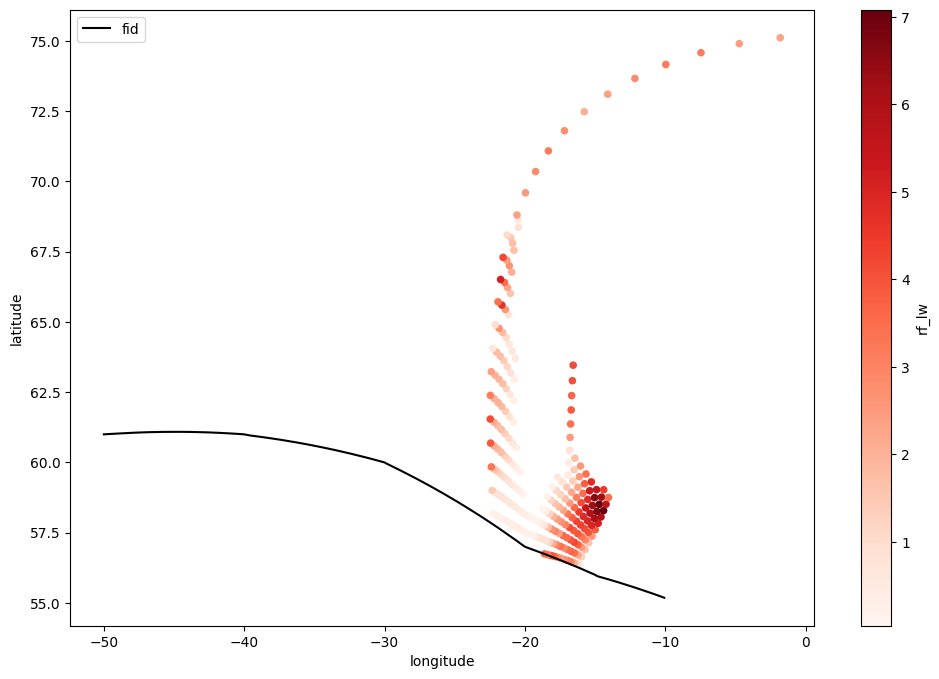

In [19]:
ax = cocip.source.dataframe.plot(
    "longitude", "latitude", color="k", label=fl.attrs["flight_id"], figsize=(12, 8)
)
cocip.contrail.plot.scatter("longitude", "latitude", c="rf_lw", cmap="Reds", ax=ax);

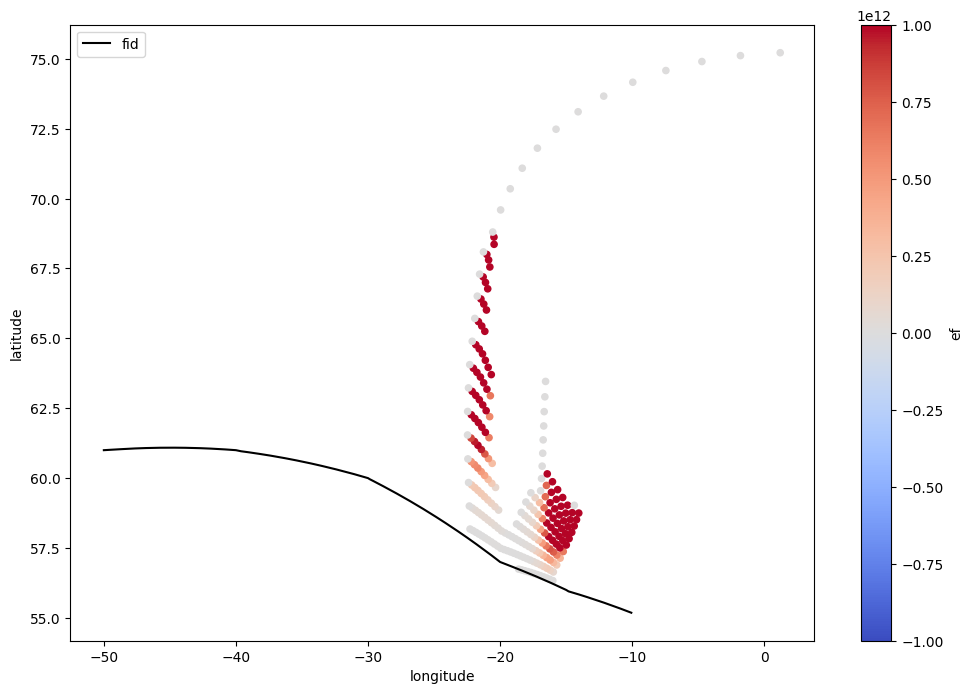

In [20]:
ax = cocip.source.dataframe.plot(
    "longitude", "latitude", color="k", label=fl.attrs["flight_id"], figsize=(12, 8)
)
cocip.contrail.plot.scatter(
    "longitude", "latitude", c="ef", cmap="coolwarm", vmin=-1e12, vmax=1e12, ax=ax
);